In [1]:
import pyPhyNR as pynr

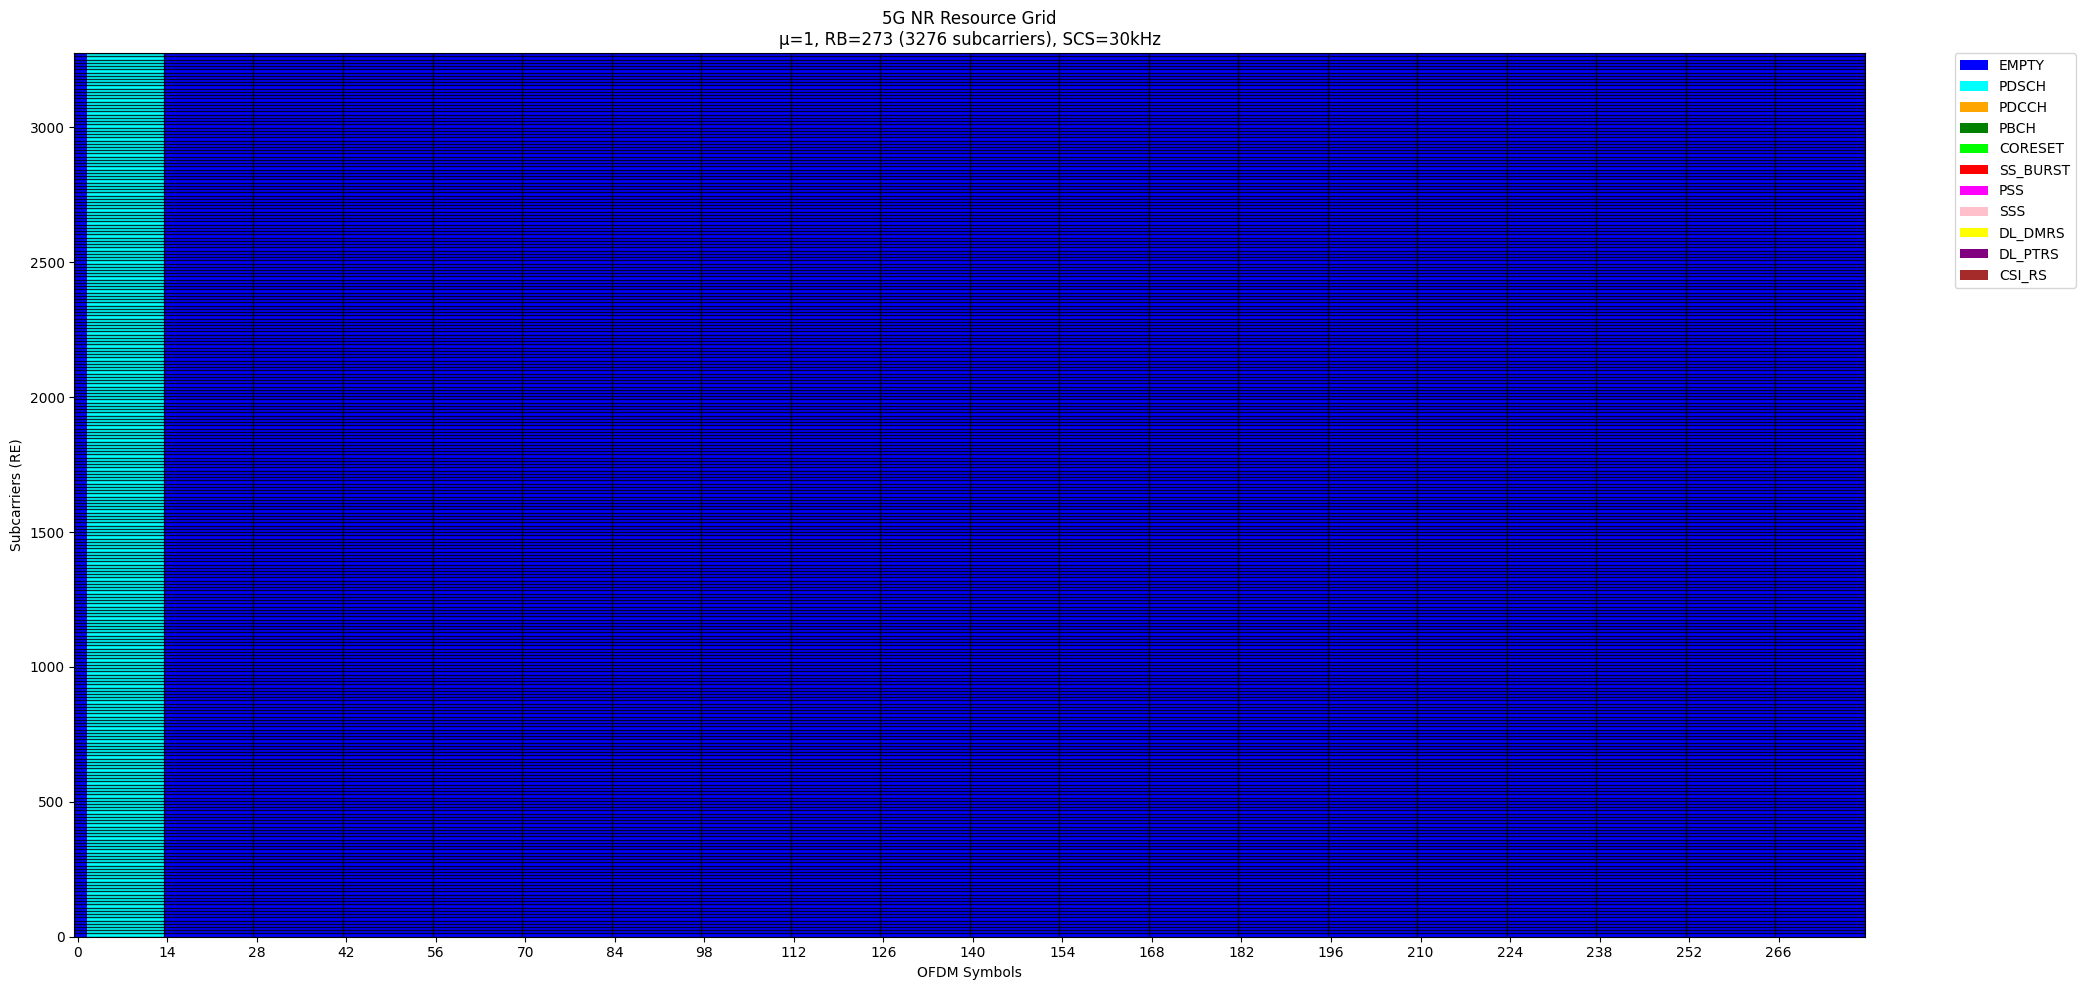

In [2]:
carrier_config = pynr.core.CarrierConfig.from_bandwidth(100, 1)
grid = carrier_config.get_resource_grid()

pdsch = pynr.core.channels.PDSCH(start_rb=0, num_rb=273, start_symbol=2, num_symbols=12, slot=0, modulation=pynr.core.ModulationType.QAM64)
grid.add_pdsch(pdsch)
pynr.utils.plot_grid_dl(carrier_config, grid)

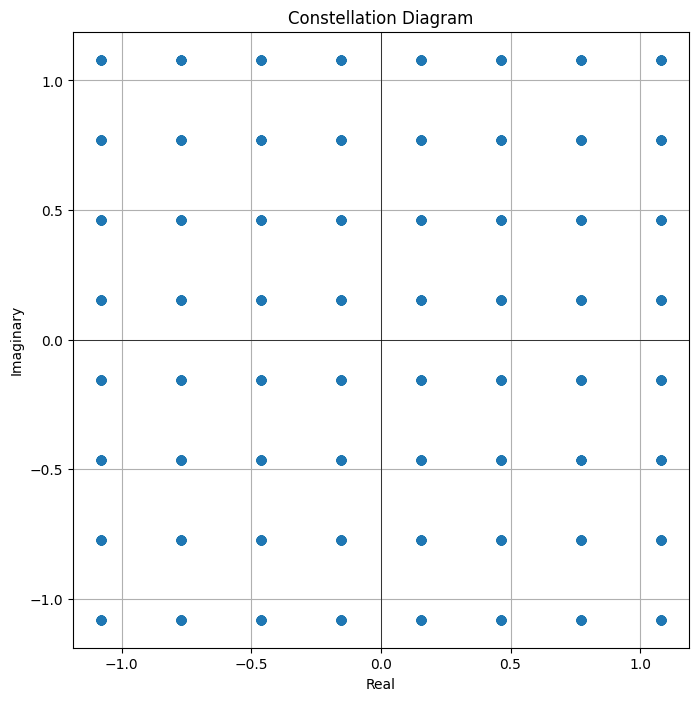

In [3]:
pynr.utils.plot_constellation(
    grid.values[:, 2],
)